In [41]:
import os
os.chdir(r"C:\Users\Marjan\Desktop\thesis\project_datascience")

In [42]:
import rasterio as rio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np
from rasterio.plot import show
import seaborn as sns
from rasterio.plot import plotting_extent
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from subprocess import call
from IPython.display import Image

## Reading related data for project 

In [43]:
shp_filename = "opialad_Soosaare_180529__modif_180703_punkt.shp"
raster_filename = "180529_Soosaare_stacked_data.tif"
raster_filename2 = "Laukasoo_180607_L1_stacked_data.tif"
shp_filename2 = "opialad_Laukasoo_180607_L1_punkt.shp"

Shape of the band: (5860, 4938)
Data type of band: <class 'numpy.ndarray'>
Type of values in band (pixels): float32


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

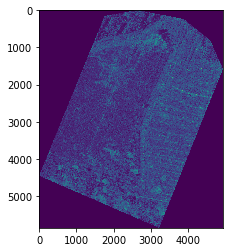

In [45]:
# Going through the data
band4 = dataset.read(4)
print("Shape of the band:" , band4.shape)
print("Data type of band:" , type(band4))
print("Type of values in band (pixels):" , band4.dtype)
#display some actual values of band
display(band4)
show(band4)

## Data Understanding

#### First project site :SOOSAARE

,kl_id,geometry
0,3,POINT (610639.1267079123 6496934.632328085)
1,3,POINT (610589.044893882 6496933.520281457)
2,3,POINT (610556.2395184744 6496932.487666734)
3,3,POINT (610561.1642963806 6496916.760150196)
4,3,POINT (610627.748087992 6496941.443613655)


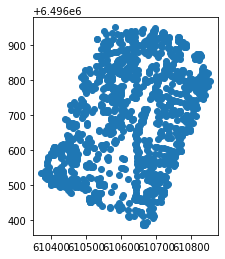

In [46]:
shp_file=gpd.read_file(shp_filename)
shp_file.plot()
shp_file = shp_file.loc[:,['kl_id', 'geometry']]
display(shp_file.head())

#### Second project site : LAUKASO

,kl_id,geometry
0,1,POINT (607021.3210093859 6597254.659517774)
1,1,POINT (607022.2484056555 6597253.732121505)
2,1,POINT (607047.1850609049 6597184.589577406)
3,1,POINT (607052.3667035542 6597181.527697658)
4,1,POINT (607050.6591167721 6597178.819111728)


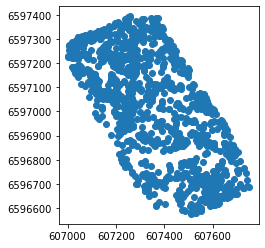

In [47]:
shp_file2=gpd.read_file(shp_filename2)
shp_file2.plot()
shp_file2 = shp_file2.loc[:,['kl_id', 'geometry']]
display(shp_file2.head())

#### Creating first data frame to combine raster file data within shapefile samples

In [48]:
rowcol_tuple = dataset.index(shp_file['geometry'].x, shp_file['geometry'].y)
rowcol = np.asarray(rowcol_tuple).T

In [49]:
for i in dataset.indexes:
    band = dataset.read(i)
    
    # create empty list to save values
    extracted_values = []

    # loop over the "coordinates" in rowcol and extract corresponding value from raster
    for coord in rowcol:
        value = band[coord[0],coord[1]]
        extracted_values.append(value)
    
    # add list with extracted values per band into dataframe column
    shp_file['band_' + str(i)] = extracted_values

In [50]:
shp_file.head()

,kl_id,geometry,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9
0,3,POINT (610639.1267079123 6496934.632328085),1273.0,2169.0,1560.0,5096.0,9935.0,57.341755,11.574537,-0.728578,-0.531250
1,3,POINT (610589.044893882 6496933.520281457),1235.0,1839.0,1524.0,4225.0,8060.0,57.003460,10.797261,-0.681970,-0.469821
2,3,POINT (610556.2395184744 6496932.487666734),620.0,1030.0,855.0,2705.0,6541.0,47.260578,0.618205,-0.768794,-0.519663
3,3,POINT (610561.1642963806 6496916.760150196),843.0,1560.0,985.0,3511.0,7927.0,56.456062,10.077833,-0.778950,-0.561833
4,3,POINT (610627.748087992 6496941.443613655),1007.0,1637.0,1220.0,3829.0,8910.0,54.656975,8.553057,-0.759131,-0.516736


#### Creating second data frame to combine raster file data within shapefile samples

In [51]:
rowcol_tuple = dataset2.index(shp_file2['geometry'].x, shp_file2['geometry'].y)
rowcol = np.asarray(rowcol_tuple).T

In [52]:
for i in dataset2.indexes:
    band = dataset2.read(i)
    
    # create empty list to save values
    extracted_values = []

    # loop over the "coordinates" in rowcol and extract corresponding value from raster
    for coord in rowcol:
        value = band[coord[0],coord[1]]
        extracted_values.append(value)
    
    # add list with extracted values per band into dataframe column
    shp_file2['band_' + str(i)] = extracted_values

In [27]:
shp_file2.head()

,kl_id,geometry,band_1,band_2,band_3,band_4,band_5,band_6,band_7
0,1,POINT (607021.3210093859 6597254.659517774),56.0,48.0,46.0,63.726379,-0.179221,-1.90,-0.137931
1,1,POINT (607022.2484056555 6597253.732121505),62.0,52.0,50.0,63.715115,-0.174792,-2.68,-0.156250
2,1,POINT (607047.1850609049 6597184.589577406),69.0,59.0,52.0,63.929634,-0.082529,0.37,-0.131579
3,1,POINT (607052.3667035542 6597181.527697658),70.0,61.0,56.0,63.833542,0.058632,-0.46,-0.120000
4,1,POINT (607050.6591167721 6597178.819111728),72.0,65.0,59.0,63.823063,-0.088021,0.93,-0.089744


## Data processing 
### Finding distribution of the lables in 1st and 2nd dataset

Text(0, 0.5, 'count')

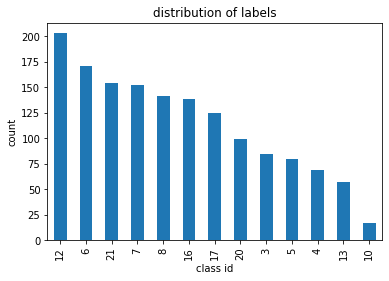

In [53]:
count_class = pd.DataFrame(shp_file.groupby('kl_id').size())
ax = shp_file.kl_id.value_counts().plot(kind='bar', title="distribution of labels")
ax.set_xlabel("class id")
ax.set_ylabel("count")

Text(0, 0.5, 'count')

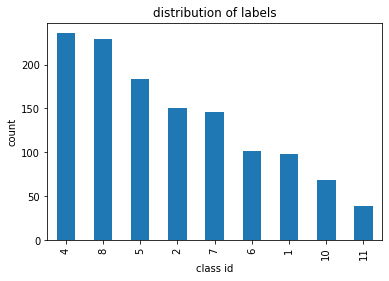

In [54]:
count_class = pd.DataFrame(shp_file2.groupby('kl_id').size())
ax = shp_file2.kl_id.value_counts().plot(kind='bar', title="distribution of labels")
ax.set_xlabel("class id")
ax.set_ylabel("count")

In [55]:
#Saving the data for creating graph in tableau
count_class1 = pd.DataFrame(shp_file.groupby('kl_id').size())
count_class2 = pd.DataFrame(shp_file2.groupby('kl_id').size())
count_class1.to_csv(r"C:\Users\Marjan\Desktop\thesis\project_datascience\distribution1.csv")
count_class2.to_csv(r"C:\Users\Marjan\Desktop\thesis\project_datascience\distribution2.csv")

## Data Wrangling and rescaling 

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 11 columns):
kl_id       1489 non-null int64
geometry    1489 non-null object
band_1      1489 non-null float64
band_2      1489 non-null float64
band_3      1489 non-null float64
band_4      1489 non-null float64
band_5      1489 non-null float64
band_6      1489 non-null float64
band_7      1489 non-null float64
band_8      1489 non-null float64
band_9      1489 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 128.0+ KB


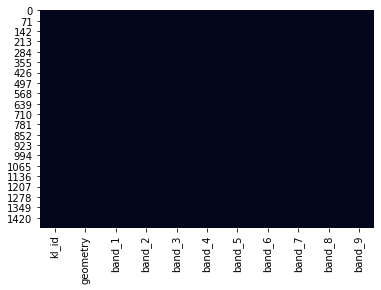

In [56]:
#Finding the null values
shp_file.info()
sns.heatmap(shp_file.isnull(), cbar=False)

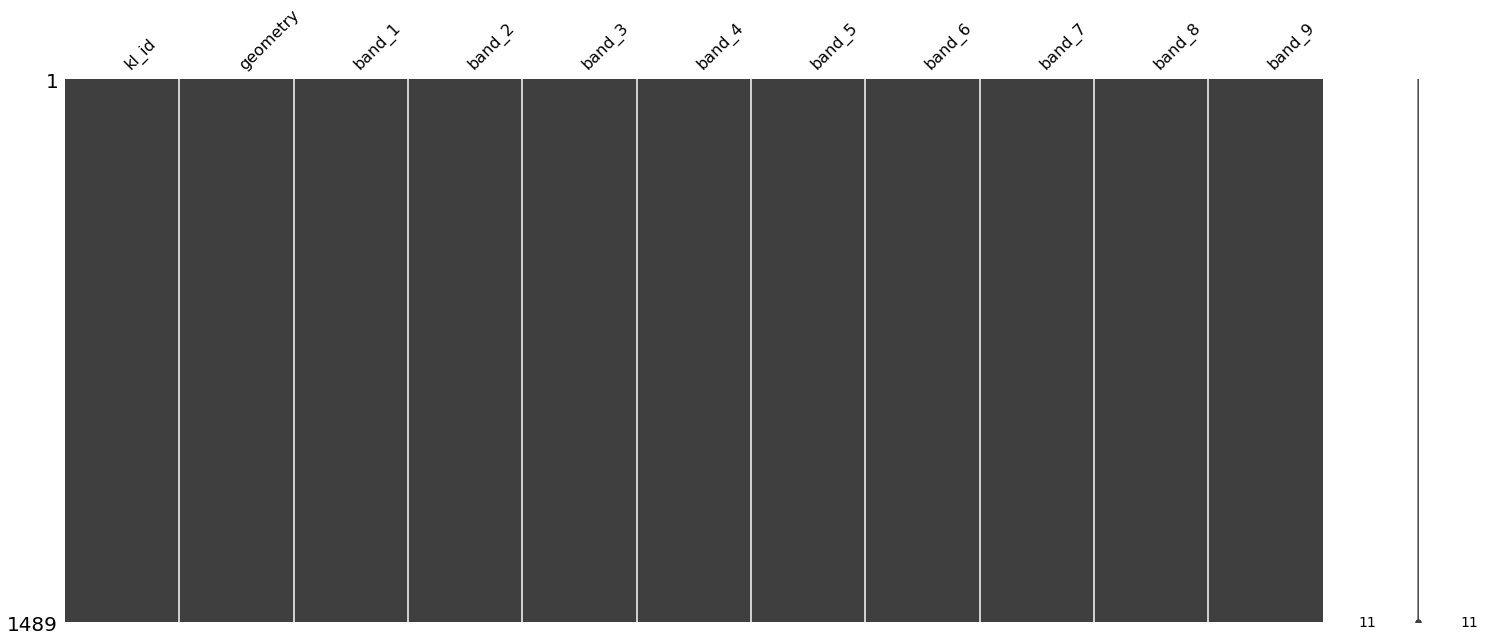

In [57]:
import missingno as msno
msno.matrix(shp_file)
#msno.heatmap(shp_file)

## Random forest classifier (without rescaling the data)

In [65]:
# Using grid search cv to train and test model to find appropriate parameters
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing,decomposition
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score #check accuracy
from sklearn.model_selection import cross_val_score
# divide the data into training and testing sets
X=shp_file.iloc[:,4:]
y=shp_file.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
rf = RandomForestClassifier()
parameters = {"n_estimators":[10,15, 20, 25, 200],
              "max_depth":[1, 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 6], 
              'min_samples_leaf': [1, 2, 3, 4, 5], "min_weight_fraction_leaf": np.linspace(0, 0.5, num = 10)}
grid_rf = GridSearchCV(rf, param_grid = parameters, cv = 3, n_jobs = 1)
grid_rf.fit(X_train, y_train)
scores_df = pd.DataFrame(grid_rf.cv_results_)
best=grid_rf.best_params_
print("Best paramters:", grid_rf.best_params_)
print("Best accuracy scores:", grid_rf.best_score_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best paramters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200}
Best accuracy scores: 0.6276391554702495


In [75]:
rf_best = grid_rf.best_estimator_
pred = rf_best.predict(X_test)
pred_prob = rf_best.predict_proba(X_test)
result = accuracy_score(pred, y_test)
result

0.5906040268456376

## Finding the importance features in RF classifier

In [77]:
feature=(pd.Series(grid_rf.best_estimator_.feature_importances_, index=X_train.columns)) 
df = pd.DataFrame(feature)

band_6    0.092122
band_3    0.122284
band_5    0.126047
band_4    0.130407
band_7    0.154880
band_8    0.165648
band_9    0.208612
dtype: float64

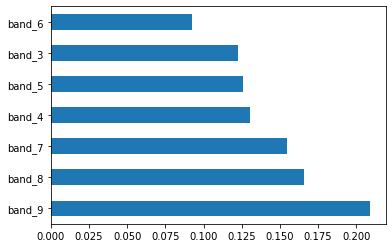

In [78]:
feature.sort_values(ascending=True,inplace=True)
feature.nlargest(12).plot(kind='barh')
feature

In [123]:
# Only working with feature importances
new_data=shp_file.drop(["band_1","band_2","band_3","band_4","band_5","band_6"],axis=1)
new_data.head()

,kl_id,geometry,band_7,band_8,band_9
0,3,POINT (610639.1267079123 6496934.632328085),11.574537,-0.728578,-0.531250
1,3,POINT (610589.044893882 6496933.520281457),10.797261,-0.681970,-0.469821
2,3,POINT (610556.2395184744 6496932.487666734),0.618205,-0.768794,-0.519663
3,3,POINT (610561.1642963806 6496916.760150196),10.077833,-0.778950,-0.561833
4,3,POINT (610627.748087992 6496941.443613655),8.553057,-0.759131,-0.516736


In [142]:
X1=shp_file.iloc[:,4:]
y1=shp_file.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.3)


In [143]:

rf = RandomForestClassifier()
parameters = {"n_estimators":[10,15, 20, 25, 200],
              "max_depth":[1, 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 6], 
              'min_samples_leaf': [1, 2, 3, 4, 5], "min_weight_fraction_leaf": np.linspace(0, 0.5, num = 10)}

grid_rf = GridSearchCV(rf, param_grid = parameters, cv = 3, n_jobs = 1)
grid_rf.fit(X_train, y_train)
scores_df = pd.DataFrame(grid_rf.cv_results_)
best=grid_rf.best_params_
print("Best paramters:", grid_rf.best_params_)
print("Best accuracy scores:", grid_rf.best_score_)

Best paramters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15}
Best accuracy scores: 0.5902111324376199


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [148]:
from sklearn.metrics import accuracy_score #check accuracy
rf_best = grid_rf.best_estimator_
pred = rf_best.predict(X_test)
result = accuracy_score(pred, y_test)
print(result)


0.610738255033557


By changing the number of features and only using the important features the accuracy score result hasn't changed significantly.

## Support vector machine (SVM) 

In [137]:
#preprocessing data
sc=StandardScaler()
x_tran=sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(x_tran,y,test_size=0.3, stratify = y)
from sklearn import svm
svm_cl = svm.SVC()
svm_cl.fit(X_train, y_train)  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [136]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm = SVC(probability = True)
parameters = {"kernel":['linear', 'rbf'], 'C': [0.001, 0.01, 0.1, 1, 10], 
              'gamma' : [0.001, 0.01, 0.1, 0.2, 0.6, 1, "auto"], 'degree':[1, 2]}

grid_svm = GridSearchCV(svm, param_grid = parameters, cv = 3, n_jobs = 1)
grid_svm.fit(X_train, y_train)
scores_df = pd.DataFrame(grid_svm.cv_results_)
print("Best paramters:", grid_svm.best_params_)

print("Best accuracy scores:", grid_svm.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best paramters: {'C': 10, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}
Best accuracy scores: 0.44049904030710174


In [138]:
y_pred=svm_cl.predict(X_test)
svm_best = grid_svm.best_estimator_
pred = svm_best.predict(X_test)
result_svm = accuracy_score(pred, y_test)
print(result_svm)

0.5145413870246085


## k Nearest neighbours (KNN) Classifier

#### Rescaling the data

In [133]:
#rescaling the data
sc=StandardScaler()
x_tran=sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(x_tran,y,test_size=0.3, stratify = y)

In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
grid_params={"n_neighbors":[3,5,11,19],
             "weights":["uniform","distance"],
             "metric":["euclidean","manhattan"]
            }
gs=GridSearchCV(
KNeighborsClassifier(),
grid_params,
verbose=1,
cv=3,
n_jobs=-1)
gs_estimate = gs.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 out of  48 | elapsed:    5.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    5.5s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [131]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=8)
y_pred_knn=gs.predict(X_train)
result_knn = accuracy_score(y_pred_knn, y_train)
print(result_knn)

0.3886756238003839


In [108]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=8)
y_pred_knn=gs.predict(X_test)
result_knn = accuracy_score(y_pred_knn, y_test)
print(result_knn)

0.6241610738255033


## Evaluation of the RF classifier on second dataset

In [83]:
## Random Forest Classifier
# divide the data into training and testing sets
X=shp_file2.iloc[:,4:]
y=shp_file2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
rf = RandomForestClassifier()
parameters = {"n_estimators":[10,15, 20, 25, 200],
              "max_depth":[1, 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 6], 
              'min_samples_leaf': [1, 2, 3, 4, 5], "min_weight_fraction_leaf": np.linspace(0, 0.5, num = 10)}
grid_rf2 = GridSearchCV(rf, param_grid = parameters, cv = 3, n_jobs = 1)
grid_rf2.fit(X_train, y_train)
scores_df2 = pd.DataFrame(grid_rf.cv_results_)
best=grid_rf2.best_params_
print("Best paramters:", grid_rf2.best_params_)
print("Best accuracy scores:", grid_rf2.best_score_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best paramters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200}
Best accuracy scores: 0.8881278538812786


In [86]:
from sklearn.metrics import accuracy_score #check accuracy
rf_best2 = grid_rf2.best_estimator_
pred2 = rf_best2.predict(X_test)
result2 = accuracy_score(pred2, y_test)
print(result2)


0.8962765957446809
